In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as shc


In [2]:
# Loading the dataset
df = pd.read_csv('EastWestAirlines.csv', index_col='ID#')
# Handling missing values (if any)
df.fillna(df.mean(), inplace=True)
# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)


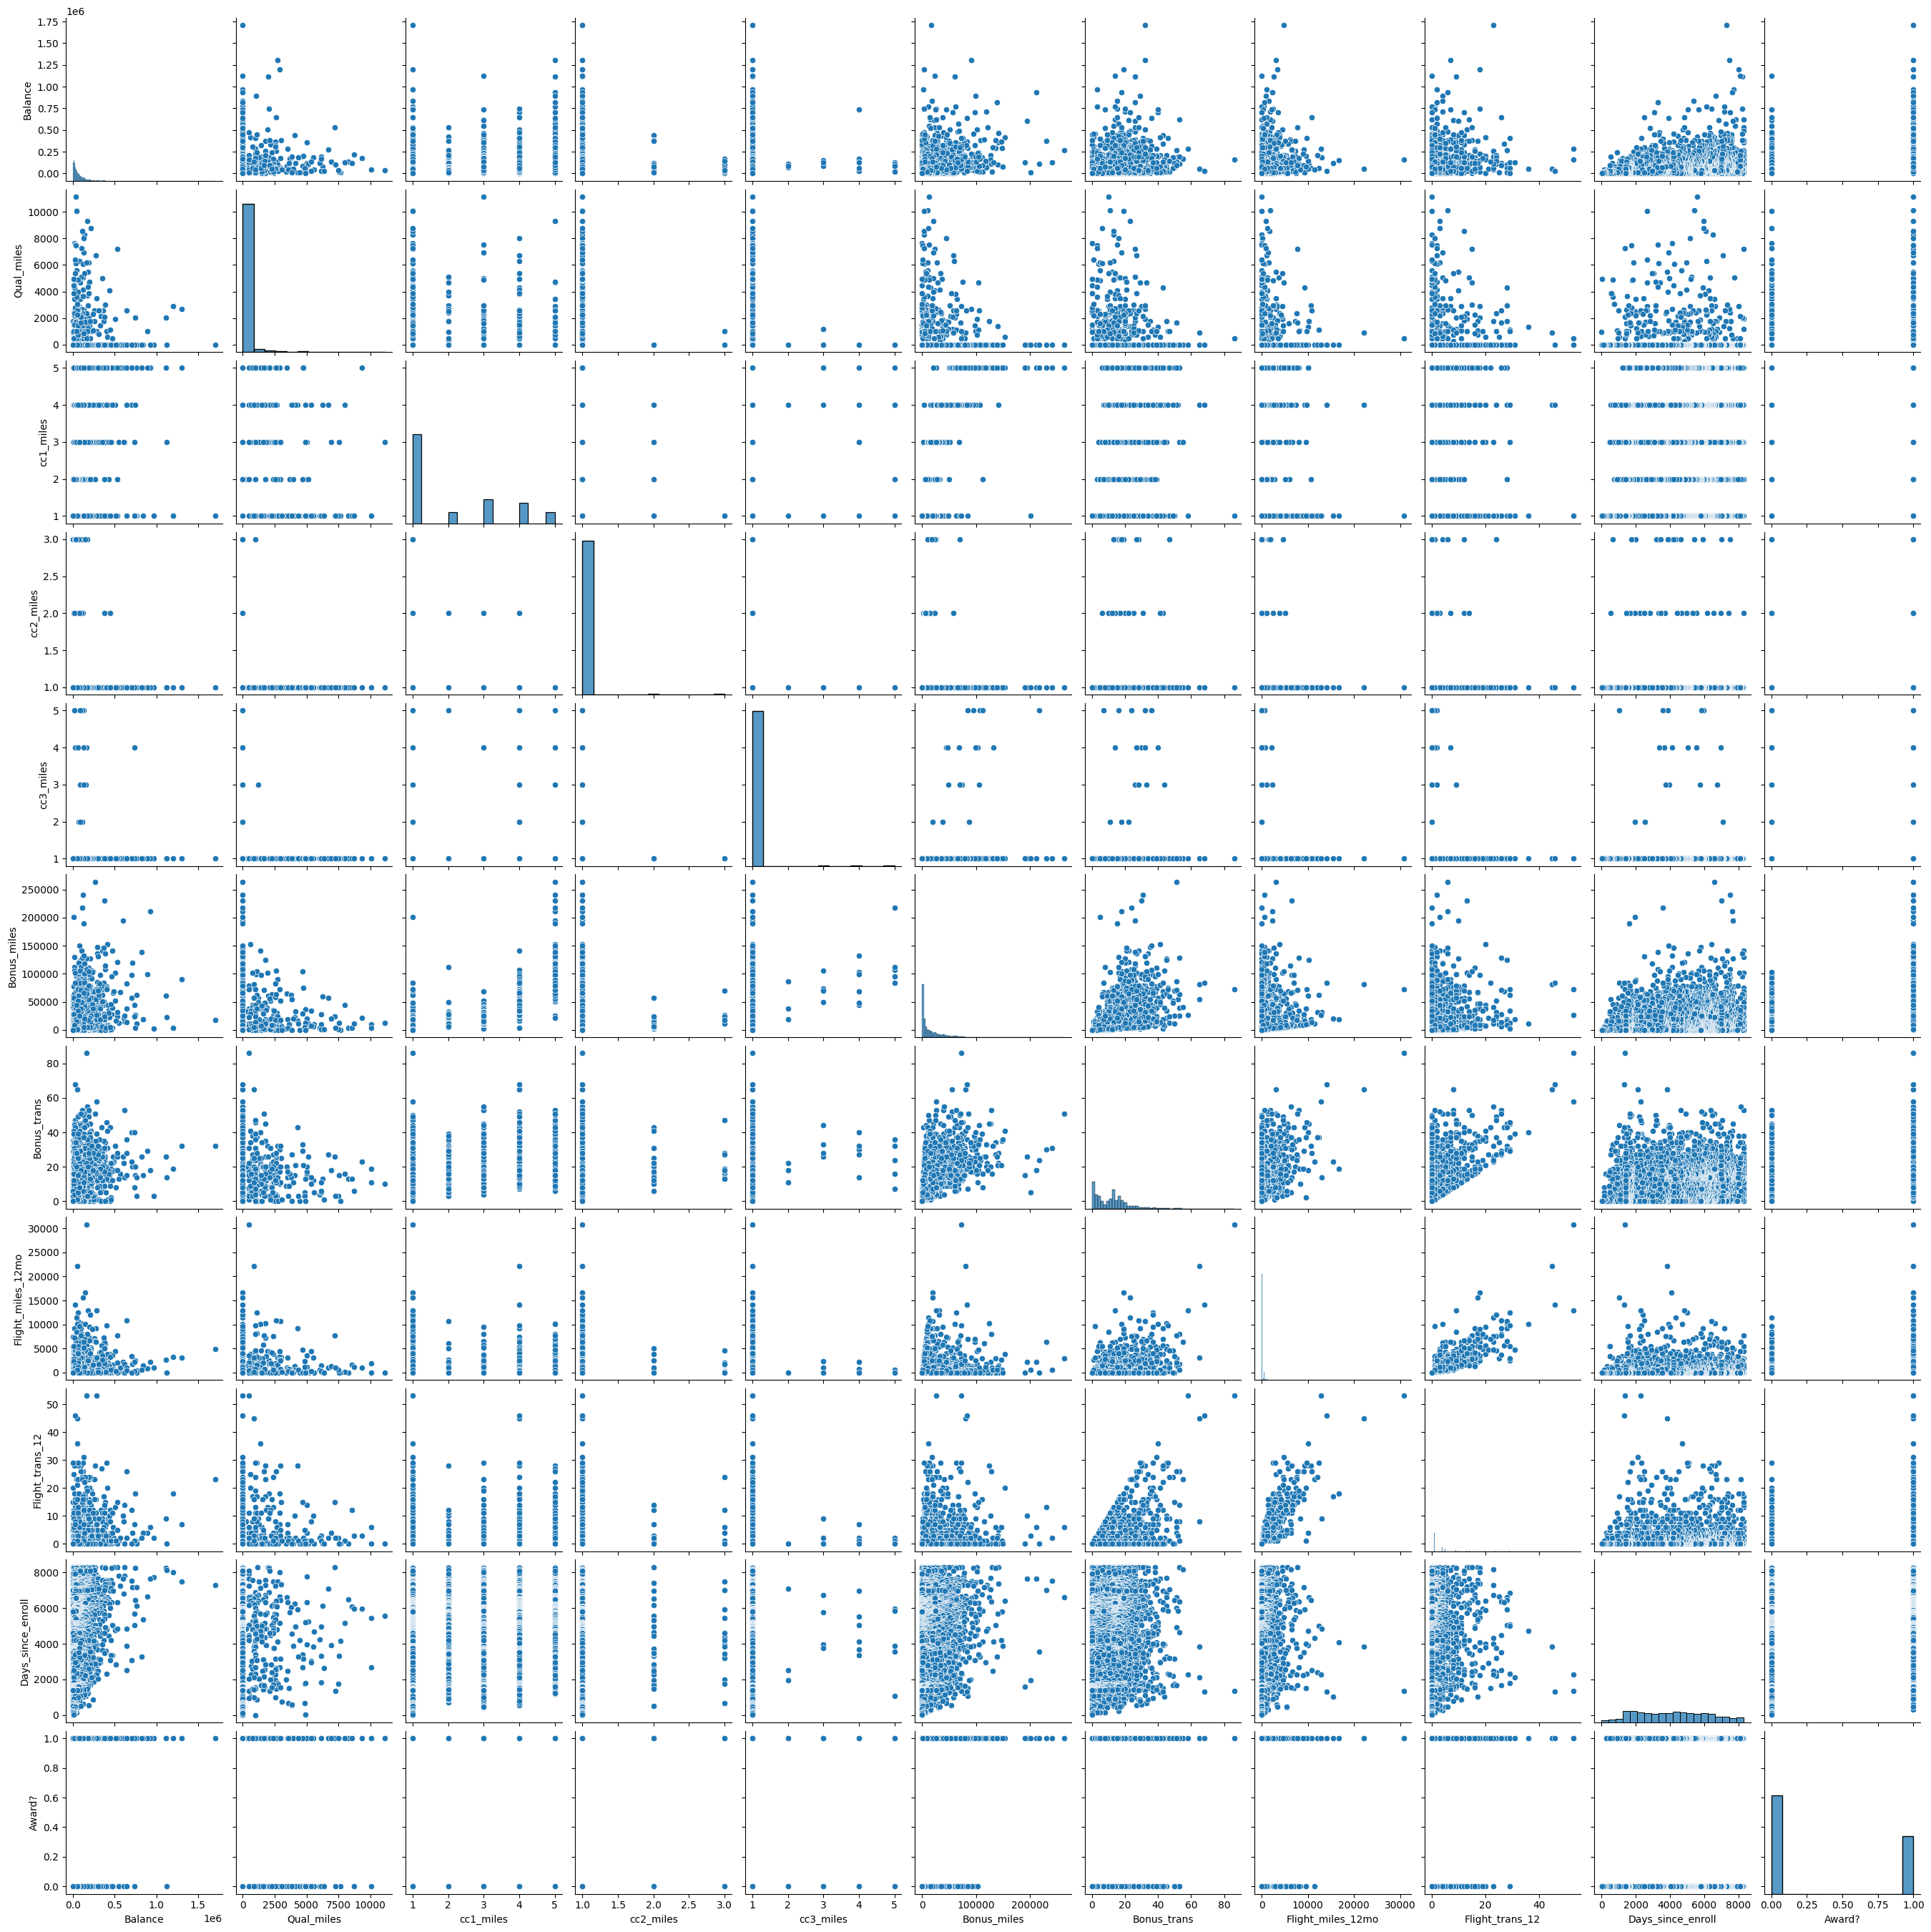

In [3]:
# Performing some EDA to visualize patterns
sns.pairplot(df)
plt.show()


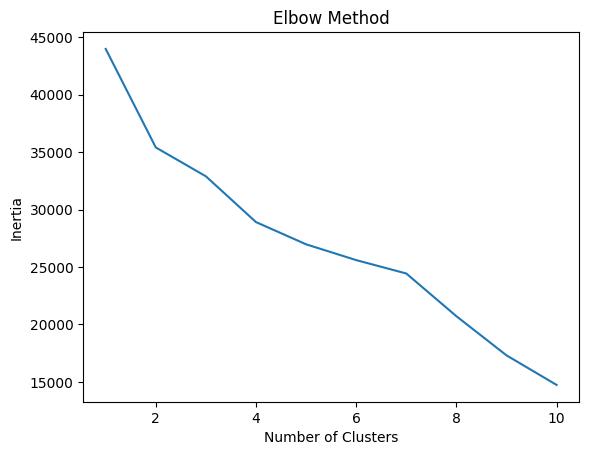

Silhouette Score for K-Means: 0.32542136327826215


In [12]:
# K-Means Clustering with Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)
# Plotting the Elbow Curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()
# Implementing K-Means with optimal K
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
labels_kmeans = kmeans.labels_
silhouette_kmeans = silhouette_score(scaled_features, labels_kmeans)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')


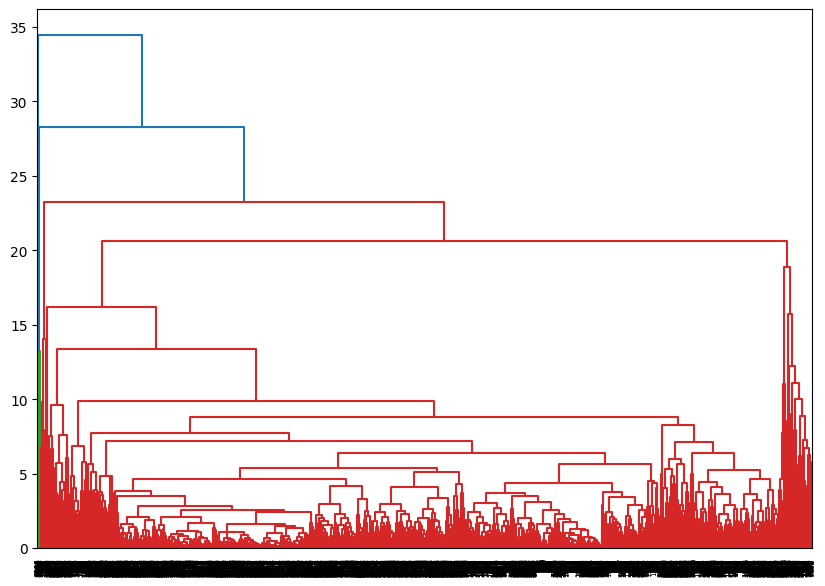

Silhouette Score for Hierarchical Clustering: 0.8111134025692677


In [15]:
# Hierarchical Clustering with Dendrogram
linked = linkage(scaled_features, method='complete')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()
# Cutting the dendrogram to form clusters
labels_hierarchical = fcluster(linked, 2, criterion='maxclust')
silhouette_hierarchical = silhouette_score(scaled_features, labels_hierarchical)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')


In [24]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.9, min_samples=16)
labels_dbscan = dbscan.fit_predict(scaled_features)
silhouette_dbscan = silhouette_score(scaled_features, labels_dbscan)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')


Silhouette Score for DBSCAN: 0.20228918780379646


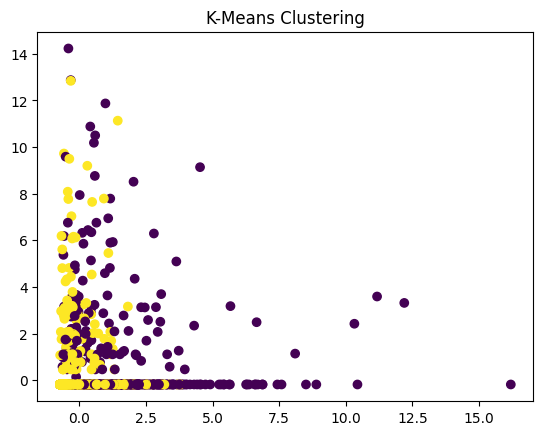

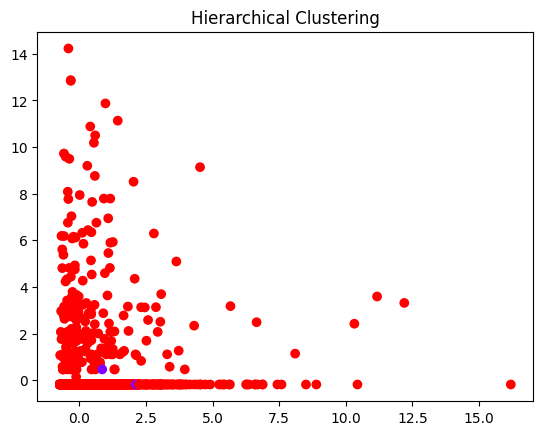

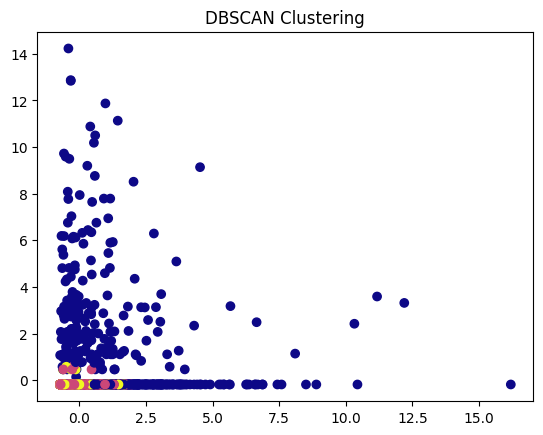

In [25]:
# Visualizing K-Means clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels_kmeans, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()
# Visualizing Hierarchical clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels_hierarchical, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()
# Visualizing DBSCAN clusters
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels_dbscan, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.show()
